### Given:  
exp data & model data of 33 species + ODE with 1 unknown h_10_TPplus

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

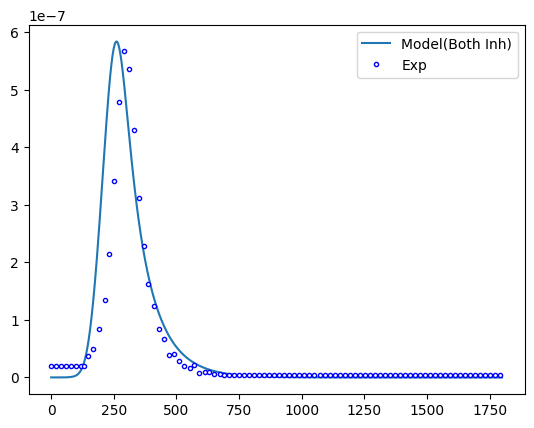

In [2]:
data = sio.loadmat("../../data/data_case_3.mat")
t_test = data["t"]
u_test = data["Y"] # scaling?

#name_list = ['TF','VII', 'TF:VII', 'VIIa', 'TF:VIIa', 'IX', 'IXa', 'IXm', 'IXam',
#'X', 'Xa', 'Xm', 'Xam', 'II', 'IIa', 'IIm', 'IIam', 'PL', 'AP', 'VIII', 'VIIIa', 'VIIIm',
#'VIIIam', 'VIIIam:IXam', 'V', 'Va', 'Vm', 'Vam', 'Xam:Vam', 'I', 'Ia', 'TFPI', 'Xa:TFPI', 'ATIII']

TIM = 1800
NDM = [0.025, 10.0, 0.005, 10.0, 0.005, 90.0, 90.0, 10.0, 10.0, 170.0,
       170.0, 10.0, 10.0, 1400.0, 1400.0, 10.0, 10.0, 10.0, 10.0,
       0.7, 0.7, 0.7, 0.7, 0.7, 20.0, 20.0, 10.0, 10.0, 10.0, 7000.0,
       7000.0, 2.5, 2.5, 3400.0] #nM

exp_data_3 = np.loadtxt("../../data/exp_data_case_3.dat").T
# t_exp_3 = exp_data_3[0].reshape([-1, 1])
# u_exp_3 = exp_data_3[1].reshape([-1, 1])

exp_data_new = sio.loadmat("../../data/exp_data_case_3_new.mat")
t_exp_3 = exp_data_new["t"]
u_exp_3 = exp_data_new["Y"]

# NDM[14] = 1400.0, NDM[16] = 10.0
plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, label='Model(Both Inh)')
plt.plot(t_exp_3, u_exp_3, 'b.', markerfacecolor='w', label='Exp')
# plt.plot(t_exp_new, u_exp_new, '--', label='Exp_new')
plt.legend()
plt.show()

[1.00000000e+00 1.00000000e+00 4.54258697e+00 5.41050264e-01
 1.29888545e-01 1.00000000e+00 1.00000000e-04 8.99075842e+00
 8.99157588e-04 1.00000000e+00 6.52850980e-04 1.69286597e+01
 2.63365081e+00 1.00000000e+00 1.19242711e-02 1.35988619e+02
 5.67362069e+01 1.00000000e+00 1.00010020e+00 1.00000000e+00
 1.00000000e-04 9.98889639e-01 9.96740400e-01 7.49224388e-03
 1.00000000e+00 1.07688723e-04 1.99890385e+00 1.94999777e+00
 1.96262243e+00 1.00000000e+00 1.00010002e+00 1.00000000e+00
 9.95287924e-01 1.00000000e+00]


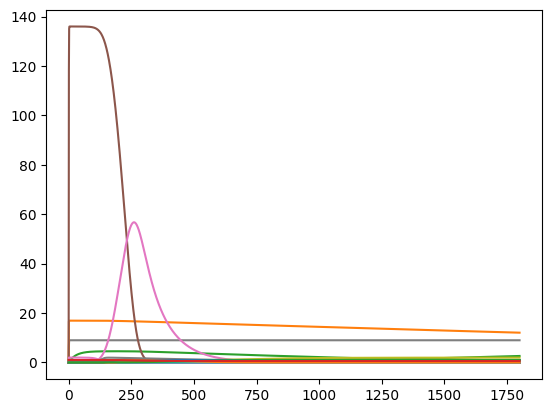

In [3]:
print(np.max(data["Y"], axis=0))

plt.plot(t_test * TIM, u_test)
plt.show()

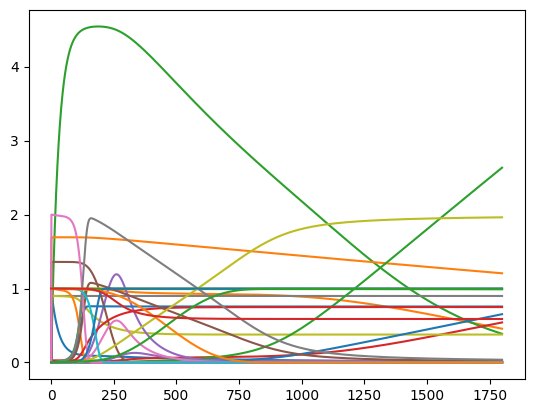

In [4]:
scale_model = np.array(
    [1, 1, 1, 1, 1, 1, 0.0001, 10, 0.001, 1, \
     0.001, 10, 1, 1, 0.01, 100, 100, 1, 1, 1, \
    0.0001, 1, 1, 0.01, 1, 0.0001, 1, 1, 1, 1, \
    1, 1, 1, 1]
).reshape([-1])

u_test = u_test / scale_model

plt.plot(t_test * TIM, u_test)
plt.show()

In [5]:
# print(u_exp_3)

scale_exp = 1e-7
u_exp_3 = u_exp_3 / scale_exp
# print(u_exp_3)

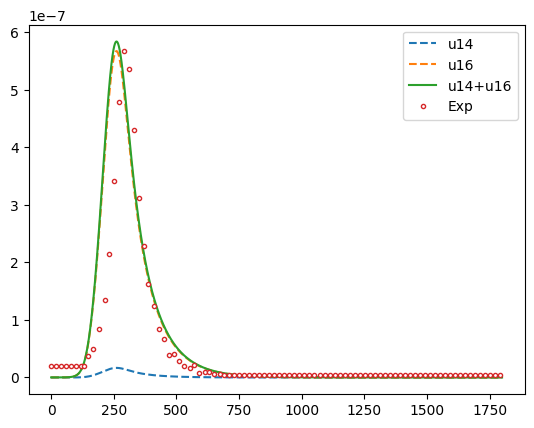

In [6]:
# scale_model[14] = 0.01, scale_model[16] = 100
plt.plot(t_test * TIM, u_test[:, 14] * NDM[14] * scale_model[14] * 1e-9, '--', label='u14')
plt.plot(t_test * TIM, u_test[:, 16] * NDM[16] * scale_model[16] * 1e-9, '--', label='u16')
plt.plot(t_test * TIM, (u_test[:, 14]* NDM[14] * scale_model[14] + u_test[:, 16] * NDM[16] * scale_model[16]) * 1e-9, label='u14+u16')
plt.plot(t_exp_3, u_exp_3 * scale_exp, '.', markerfacecolor='w', label='Exp')
plt.legend()
plt.show()

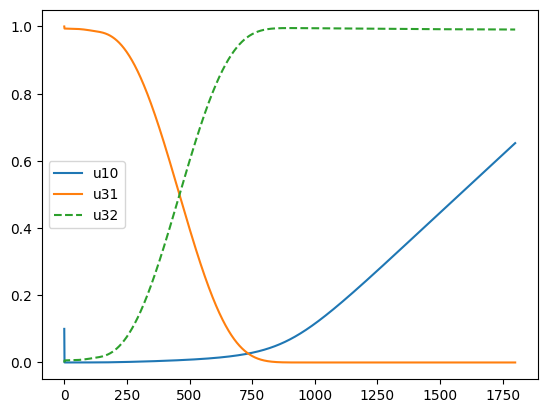

In [7]:
plt.plot(t_test * TIM, u_test[:, 10], label='u10')
plt.plot(t_test * TIM, u_test[:, 31], label='u31')
plt.plot(t_test * TIM, u_test[:, 32], '--', label='u32')
plt.legend()
plt.show()

In [9]:
t_train_model = t_test[::20]
u_train_model = u_test[::20]
t_train_exp = t_exp_3 / TIM
u_train_exp = u_exp_3
f_train = np.zeros_like(u_train_model)

model = models.PINN(eps1=10, eps2=0.1, eps3=1)

In [9]:
# loss = model.train(t_train, f_train, t_train, u_train, niter=200000)
# loss = model.train(t_train_model, f_train, t_train_model, u_train_model, t_train_exp, u_train_exp, niter=100000)
# print total loss, model data loss, exp_data_loss, ode loss, eq10_loss,eq31_loss, eq32_loss

In [10]:
model.restore()
u_pred_model = model.call(tf.constant(t_train_model, tf.float32)).numpy()
u_pred_exp = model.call(tf.constant(t_train_exp, tf.float32)).numpy()

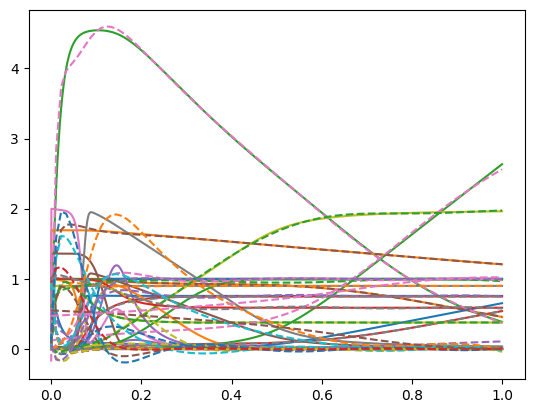

In [11]:
plt.plot(t_test, u_test)
plt.plot(t_train_model, u_pred_model, '--')
plt.show()

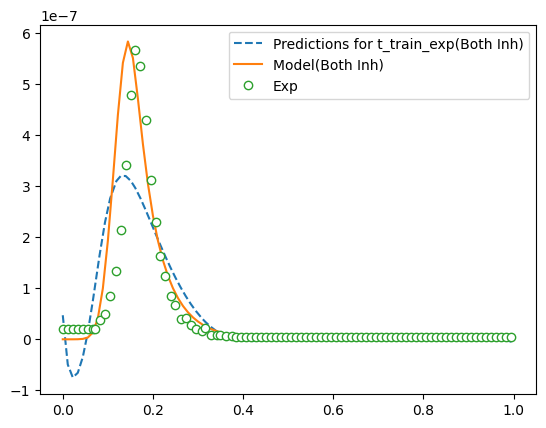

In [13]:
# plt.plot(t_train_model, u_pred_model[:, 16:17] * NDM[16] * scale_model[16] * 1e-9, '--', label='Predictions(Both Inh)')
plt.plot(t_train_exp, u_pred_exp[:, 16:17] * NDM[16] * scale_model[16] * 1e-9, '--', label='Predictions for t_train_exp(Both Inh)')
plt.plot(t_train_model, (u_train_model[:, 14] * NDM[14] * scale_model[14] + u_train_model[:, 16] * NDM[16] * scale_model[16]) * 1e-9, label='Model(Both Inh)')
plt.plot(t_train_exp, u_train_exp * scale_exp, "o", markerfacecolor='w', label='Exp')
plt.legend()
plt.show()

In [44]:
# h_10_TPplus = 4.381
# h_10_TPminus = 5.293 * 1e-8
# h_2 = 1.79 * 1e-4
print("h_10_TPplus:", tf.math.exp(model.log_h_10_TPplus).numpy())
# print("h_10_TPminus:", model.h_10_TPminus.numpy())
# print("h_2:", model.h_2.numpy())

h_10_TPplus: 71.6453


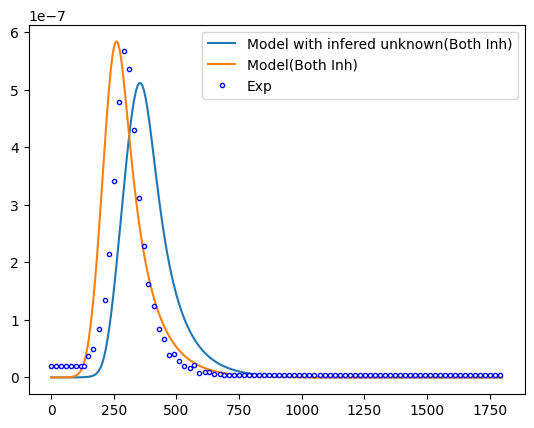

In [45]:
data_tmp = sio.loadmat("../../data/tmp.mat")
t_tmp = data_tmp["t"]
u_tmp = data_tmp["Y"]

plt.plot(t_tmp * TIM, (u_tmp[:, 14] * NDM[14] + u_tmp[:, 16] * NDM[16]) * 1e-9, label='Model with infered unknown(Both Inh)')
plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] * scale_model[14] + u_test[:, 16] * NDM[16] * scale_model[16]) * 1e-9, label='Model(Both Inh)')
plt.plot(t_train_exp * TIM, u_train_exp * scale_exp, 'b.', markerfacecolor='w', label='Exp')
plt.legend()
plt.show()

In [37]:
# plt.plot(t_train_model, u_pred_model[:, 14] * NDM[14] * scale_model[14] * 1e-9, '--')
# plt.plot(t_train_model, u_train_model[:, 14] * NDM[14] * scale_model[14] * 1e-9)
# plt.show()

In [66]:
# plt.plot(t_train_model, u_pred_model[:, 16] * NDM[16] * scale_model[16] * 1e-9, '--')
# plt.plot(t_train_model, u_train_model[:, 16] * NDM[16] * scale_model[16] * 1e-9)
# plt.show()